# DSC 80: Project 01

### Checkpoint Due Date: Monday, October 12, 11:59:59 PM (Questions 1-4)
### Due Date: Monday, October 19, 11:59:59 PM

---
# Instructions

This Jupyter Notebook contains the statements of the problems and provides code and markdown cells to display your answers to the problems.  
* Like the lab, your coding work will be developed in the accompanying `project01.py` file, that will be imported into the current notebook. This code will be autograded.
* **For the checkpoint, turn in questions 1-4**

**Do not change the function names in the `*.py` file**
- The functions in the `*.py` file are how your assignment is graded, and they are graded by their name. The dictionary at the end of the file (`GRADED FUNCTIONS`) contains the "grading list". The final function in the file allows your doctests to check that all the necessary functions exist.
- If you changed something you weren't supposed to, just use git to revert!

**Tips for developing in the .py file**:
- Do not change the function names in the starter code; grading is done using these function names.
- Do not change the docstrings in the functions. These are there to tell you if your work is on the right track!
- You are **encouraged to write your own additional functions** to solve the questions! 
    - Developing in python usually consists of larger files, with many short functions.
    - You may write your other functions in an additional `.py` file that you import in `project01.py` -- however, be sure to upload these to gradescope as well!
- Always document your code!

**Tips for testing the correctness of your answers!**
Once you have your work saved in the .py file, you should import the `project01` to test your function out in the notebook. In the notebook you should inspect/analyze the output to assess its correctness!
* Run your functions on the main dataset (`grades`) and ask yourself if the output *looks correct.*
* Run your functions on very small datasets (e.g. 1-5 row table), calculate the expected response by hand, and see if the function output matches (this *is* unit-testing your code with data).
* Run your functions on (large and small) samples of the dataset `grades` (with and without replacement). Does your code break? Or does it still run as expected.

In [747]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [748]:
import pandas as pd
import numpy as np
import os

# The Other Side of Gradescope

The file contains the grade-book from a fictional data science course with 535 students. 

**Note: this dataset is synthetically generated; it does not contain real student grades.**

In this project, you will:
1. clean and process the data to compute total course grades according to a fictional syllabus (below),
2. qualitatively understand how students did in the course,
3. understand how student grades vary with small changes in performance on each assignment.

---

The course syllabus is as follows:

* Lab assignments 
    - Each are worth the same amount, regardless of each lab's raw point total.
    - The lowest lab is dropped.
    - Each lab may be revised for one week after submission for a 10% penalty, for two weeks after submission for a 30% penalty, and beyond that for a 60% penalty. Such revisions are reflected in the `Lateness` columns in the gradebook.
    - Labs are 20% of the total grade.
* Projects 
    - Each project consists of an autograded portion, and *possibly* a free response portion.
    - The total points for a single project consist of the sum of the raw score of the two portions.
    - Each are worth the same amount, regardless of each project's raw point total.
    - Projects are 30% of the total grade.
* Checkpoints
    - Project checkpoints are worth 2.5% of the total grade.
* Discussion
    - Discussion notebooks are worth 2.5% of the total grade.
* Exams
    - The midterm is worth 15% of the total grade.
    - The final is worth 30% of the total grade.


### A note on generalization

You may assume that your code will only need to work on a gradebook for a class with the syllabus given above. That is, you may assume that the dataframe `grades` looks like the given one in `data/grades.csv`.

However, such a class:
1. may have a different numbers of labs, projects, discussions, and project checkpoints.
2. may have a different number of students.

You may assume the course components and the naming conventions are as given in the data file.

The dataset was generated by Gradescope; you must attempt to reason about the data as given using what you know as a student who uses Gradescope.

### A note on 'putting everything together'

The goal of this project is to create and assess final grades for a fictional course; if anything, the process is broken down into functions for your convenience and guidance. Here are a few remarks and tips for approaching the projects:
1. If you are having trouble figuring out what a question is asking you to do, look at the big picture and try to understand what the current step is doing to contribute to this big picture. This may clarify what's being asked!
1. These questions intentionally build off of each other and the final result matters! In fact, you can 'get a question correct', but only receive partial credit on it because a previous answer was wrong.
    - Credit for a question will typically receive partial credit based on *how close* your answer is to correct (as well as some credit for a solution in the correct form). 
    - You should try to assess your answer to each question based on what you understand of the data. This might involve writing extensive code (that isn't turned in) just to check your work! Suggestions on checking your work are given in the assignment, but you should also think of your own ways of checking your work.
    - As you do this project, think about the data from the perspective of the student (which should be easy to do!)

In [749]:
grades_fp = os.path.join('data', 'grades.csv')
grades = pd.read_csv(grades_fp)

### Getting started: enumerating the assignments

First, you will list all the 'assignment names' and what part of the syllabus to which they belong.

**Question 1:**

Create a function `get_assignment_names` that takes in a dataframe like `grades` and returns a dictionary with the following structure:
- The keys are the general areas of the syllabus: `lab, project, midterm, final, disc, checkpoint`
- The values are lists that contain the assignment names of that type. For example the lab assignments all have names of the form `labXX` where `XX` is a zero-padded two digit number. See the doctests for more details.

In [750]:
def get_assignment_names(grades):
    '''
    get_assignment_names takes in a dataframe like grades and returns 
    a dictionary with the following structure:

    The keys are the general areas of the syllabus: lab, project, 
    midterm, final, disc, checkpoint

    The values are lists that contain the assignment names of that type. 
    For example the lab assignments all have names of the form labXX where XX 
    is a zero-padded two digit number. See the doctests for more details.    

    :Example:
    >>> grades_fp = os.path.join('data', 'grades.csv')
    >>> grades = pd.read_csv(grades_fp)
    >>> names = get_assignment_names(grades)
    >>> set(names.keys()) == {'lab', 'project', 'midterm', 'final', 'disc', 'checkpoint'}
    True
    >>> names['final'] == ['Final']
    True
    >>> 'project02' in names['project']
    True
    '''
    keys = ['lab', 'project', 'midterm', 'final', 'disc', 'checkpoint']

#Create the blank dictionary
#grades_dict = dict(zip(keys, [[]]*len(keys)))

#Clean data frame to contain only what we need
    df = grades[grades.columns.drop(list(grades.filter(regex='Max')))]
    df = df[df.columns.drop(list(df.filter(regex='Lateness')))]
   # df = df[df.columns.drop(list(df.filter(regex='response')))]
    df = df.drop('PID', axis=1).drop('College', axis=1).drop('Level', axis =1)

#Create a list of column names (values for dictionary)
    columns = list(df.columns)
    grades_dict = {}
    for key in keys:
        grades_dict[key] = []
        for col in columns:
            if key in col.lower():
                grades_dict[key].append(col)
   
    remove_lst = []         
    for elem in grades_dict['project']:
        if 'checkpoint' in elem:
            remove_lst.append(elem)
    
    for elem in remove_lst:
        grades_dict['project'].remove(elem)
    
    
    return grades_dict
    

In [762]:
df = grades.groupby('PID').sum()
df = pd.pivot_table(df,index = 'Final')
df

,Final - Max Points,Midterm,Midterm - Max Points,discussion01,discussion01 - Max Points,discussion02,discussion02 - Max Points,discussion03,discussion03 - Max Points,discussion04,...,project03,project03 - Max Points,project03_checkpoint01,project03_checkpoint01 - Max Points,project04,project04 - Max Points,project05,project05 - Max Points,project05_free_response,project05_free_response - Max Points
Final,,,,,,,,,,,,,,,,,,,,,
0.000000,696.0,0.000000,376.0,0.000000,80,0.000000,80,0.000000,80,0.000000,...,0.000000,800.0,0.000000,80.0,0.000000,600,0.000000,600,0.000000,200
59.399214,87.0,37.347259,47.0,9.759257,10,10.000000,10,9.771870,10,10.000000,...,100.000000,100.0,1.575678,10.0,75.000000,75,74.913528,75,25.000000,25
69.193555,87.0,37.537357,47.0,10.000000,10,10.000000,10,8.245303,10,8.253235,...,100.000000,100.0,0.000000,10.0,66.470037,75,72.715989,75,21.804778,25
71.260579,87.0,36.512400,47.0,6.969141,10,4.876932,10,6.326166,10,5.079004,...,63.167323,100.0,0.000000,10.0,37.242281,75,43.686603,75,11.930103,25
72.962796,87.0,41.102692,47.0,10.000000,10,10.000000,10,10.000000,10,10.000000,...,99.815385,100.0,1.289017,10.0,73.567390,75,75.000000,75,25.000000,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
684.255837,870.0,451.587501,470.0,96.261142,100,97.705513,100,97.851245,100,99.188304,...,781.301175,1000.0,41.023998,100.0,685.221788,750,719.017659,750,223.644515,250
743.398865,783.0,417.814030,423.0,85.287552,90,83.768123,90,87.470495,90,87.121138,...,852.243702,900.0,37.550560,90.0,584.877604,675,637.069939,675,179.601380,225
822.638837,1044.0,483.680695,564.0,101.089175,120,101.139158,120,100.589919,120,105.002941,...,1027.209291,1200.0,34.692169,120.0,685.018051,900,746.721704,900,224.285508,300


In [751]:
grades_fp = os.path.join('data', 'grades.csv')
grades = pd.read_csv(grades_fp)
get_assignment_names(grades)

{'lab': ['lab01',
  'lab02',
  'lab03',
  'lab04',
  'lab05',
  'lab06',
  'lab07',
  'lab08',
  'lab09'],
 'project': ['project01',
  'project01_free_response',
  'project02',
  'project02_free_response',
  'project03',
  'project05_free_response',
  'project04',
  'project05'],
 'midterm': ['Midterm'],
 'final': ['Final'],
 'disc': ['discussion01',
  'discussion02',
  'discussion03',
  'discussion04',
  'discussion05',
  'discussion06',
  'discussion07',
  'discussion08',
  'discussion09',
  'discussion10'],
 'checkpoint': ['project02_checkpoint01',
  'project02_checkpoint02',
  'project03_checkpoint01']}

In [570]:
grades[['project01',
  'project01_free_response',
  'project02',
  'project02_free_response',
  'project03',
  'project05_free_response',
  'project04',
  'project05', 'project01 - Max Points',
  'project01_free_response - Max Points',
  'project02 - Max Points',
  'project02_free_response - Max Points',
  'project03 - Max Points',
  'project05_free_response - Max Points',
  'project04 - Max Points',
  'project05 - Max Points']]

,project01,project01_free_response,project02,project02_free_response,project03,project05_free_response,project04,project05,project01 - Max Points,project01_free_response - Max Points,project02 - Max Points,project02_free_response - Max Points,project03 - Max Points,project05_free_response - Max Points,project04 - Max Points,project05 - Max Points
0,75.282632,15.000000,75.000000,19.955421,85.519583,22.467797,68.230985,73.917020,85.0,15.0,75.0,25.0,100.0,25,75,75
1,52.929482,9.987089,62.926075,25.000000,88.201035,19.729680,49.884266,57.680370,85.0,15.0,75.0,25.0,100.0,25,75,75
2,46.122801,15.000000,62.290938,25.000000,77.043708,13.069564,41.548308,46.714963,85.0,15.0,75.0,25.0,100.0,25,75,75
3,79.121806,13.286839,70.558311,25.000000,94.299439,25.000000,74.267897,75.000000,85.0,15.0,75.0,25.0,100.0,25,75,75
4,41.823703,15.000000,71.043328,25.000000,90.805754,14.889447,44.484302,50.848312,85.0,15.0,75.0,25.0,100.0,25,75,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
530,78.936816,13.693789,65.932566,25.000000,98.070705,22.167221,71.937036,75.000000,85.0,15.0,75.0,25.0,100.0,25,75,75
531,72.076801,3.581466,71.058797,24.585857,76.384220,21.363680,68.344038,73.221261,85.0,15.0,75.0,25.0,100.0,25,75,75
532,66.273252,15.000000,75.000000,21.738233,90.107681,21.473725,58.207189,63.822615,85.0,15.0,75.0,25.0,100.0,25,75,75
533,63.965217,12.828692,75.000000,17.087958,88.717789,20.315673,51.220883,60.524285,85.0,15.0,75.0,25.0,100.0,25,75,75


In [421]:
col

0      00:00:00
1      00:00:00
2      00:00:00
3      00:00:00
4      00:00:00
         ...   
530    47:26:10
531    00:00:00
532    00:00:00
533    00:00:00
534    00:00:00
Name: lab01 - Lateness (H:M:S), Length: 535, dtype: object

### Computing project grades

**Question 2**

Compute the total score for the project portion of the course according to the syllabus. Create a function `projects_total` that takes in `grades` and computes the total project grade for the quarter according to the syllabus. The output Series should contain values between 0 and 1.

*Note*: Don't forget to properly handle students who didn't turn in assignments! (Use your experience and common sense).

*Note:* To check your work, try (1) calculating the score for a few types of students by hand, and (2) calculate the statistics for the class performance on each individual course project, making sure they look reasonable.

In [557]:
def projects_total(grades):
    #project01 grade
    #project 01 max points
    #project 01 free response 
    #project 01 free response max points
    grades = grades.fillna(value=0)
    columns = list(grades.columns)

    #separate max points for normal and free response 
    cols_raw = []
    cols_max = []
    fr_cols_raw = []
    fr_cols_max = []
    for col in columns:
        if 'project' in col and 'checkpoint' not in col and 'Lateness' not in col:
            if "free" in col:
                if 'Max' in col:
                    fr_cols_max.append(col)
                else:
                    fr_cols_raw.append(col)
            else: 
                if 'Max' in col:
                    cols_max.append(col)
                else:
                    cols_raw.append(col)
    df = pd.DataFrame()
    
    for col in cols_raw:
        max_col_nm =''
        fr_col_nm =''
        max_fr_col_nm =''
        for max_col in cols_max:
            if col in max_col:
                max_col_nm = max_col
        for fr_col in fr_cols_raw:
            if col in fr_col:
                fr_col_nm = fr_col
        for max_fr_col in fr_cols_max:
            if col in max_fr_col:
                max_fr_col_nm = max_fr_col
        if fr_col_nm == '':
            df[col] = grades[col] / grades[max_col_nm]
        else:
            df[col] = (grades[col] + grades[fr_col_nm]) / (grades[max_col_nm] + grades[max_fr_col_nm])
    return df.mean(axis = 1)

#free response is NOT always there

#naN values mean student gets auto zero (did not turn in assignment)

#add rows project01 and project01_free_response if exists 

#add rows project01 - Max Points and project01_free_response - Max Points if exists

#divide raw scores by max scores and insert into series. 

In [558]:
grades_fp = os.path.join('data', 'grades.csv')
grades = pd.read_csv(grades_fp)
out = projects_total(grades)

In [559]:
out

0      0.916234
1      0.765932
2      0.681279
3      0.962581
4      0.737446
         ...   
530    0.949434
531    0.866795
532    0.862050
533    0.813468
534    0.939433
Length: 535, dtype: float64

In [425]:
df = grades.head(20)
df



,PID,College,Level,lab01,lab01 - Max Points,lab01 - Lateness (H:M:S),lab02,lab02 - Max Points,lab02 - Lateness (H:M:S),project01,...,discussion07 - Lateness (H:M:S),discussion08,discussion08 - Max Points,discussion08 - Lateness (H:M:S),discussion09,discussion09 - Max Points,discussion09 - Lateness (H:M:S),discussion10,discussion10 - Max Points,discussion10 - Lateness (H:M:S)
0,A14721419,SI,JR,99.735279,100.0,00:00:00,84.990171,100.0,00:00:00,75.282632,...,00:00:00,8.895294,10,00:00:00,10.000000,10,780:01:28,10.000000,10,00:00:00
1,A14883274,TH,JR,98.829476,100.0,00:00:00,50.784231,100.0,00:00:00,52.929482,...,669:12:21,9.022407,10,00:00:00,9.020283,10,00:00:00,9.437368,10,00:00:00
2,A14164800,SI,SR,86.513369,100.0,00:00:00,47.802820,100.0,00:00:00,46.122801,...,00:00:00,3.030538,10,00:04:51,7.613698,10,00:00:00,9.624617,10,00:00:00
3,A14847419,TH,JR,100.000000,100.0,00:00:00,100.000000,100.0,00:00:00,79.121806,...,00:00:00,10.000000,10,00:00:00,9.249126,10,00:00:00,10.000000,10,00:00:00
4,A14162943,SI,JR,66.506974,100.0,00:00:00,33.422412,100.0,00:00:00,41.823703,...,00:00:00,4.439606,10,00:00:00,4.485291,10,00:00:00,6.282712,10,00:00:00
5,A14282114,RE,SR,92.821876,100.0,00:00:00,100.000000,100.0,00:00:00,67.807382,...,00:00:00,9.775659,10,00:00:00,10.000000,10,00:00:00,8.416273,10,00:00:00
6,A14297403,MU,SR,98.120326,100.0,00:00:00,46.650293,100.0,00:00:00,56.472871,...,00:00:00,8.415400,10,00:00:00,4.900131,10,46:35:38,7.246751,10,00:00:00
7,A14369624,WA,JR,100.000000,100.0,00:00:00,99.639454,100.0,00:00:00,82.822490,...,04:09:52,10.000000,10,00:00:00,9.595310,10,00:00:00,10.000000,10,00:00:00
8,A14137484,FI,SR,91.534841,100.0,00:00:00,100.000000,100.0,00:00:00,69.068823,...,00:00:00,9.636072,10,00:00:00,9.059151,10,42:06:36,9.984830,10,00:00:00
9,A14353945,WA,JR,100.000000,100.0,00:00:00,99.295439,100.0,00:00:00,81.057021,...,00:00:00,10.000000,10,00:00:00,10.000000,10,00:00:00,10.000000,10,00:00:00


### Computing lab grades

Now, you will clean and process the lab grades, which is a little more complicated. To do this, you will develop functions that:
- 'normalize' the grades, 
- adjust for late submissions, 
- drop the lowest lab grade, and 
- creates a total lab score for each student.

**Question 3**

Unfortunately, Gradescope sometimes experiences a delay in registering when an assignment is submitted during "periods of heavy usage" (i.e. near a submission deadline). You need to assess when a student's assignment was actually turned in on time, even if Gradescope did not process it in time. To do this, it is helpful to know:
* Every late submission has to be submitted by a TA (late submissions are turned off).
* TAs never submitted a late assignment "just after" the deadline. 
* The deadlines were at midnight and students had to come to staff hours to late-submit their assignment.

Create a function `last_minute_submissions` that takes in the dataframe `grades` and outputs the number of submissions on each assignment that were turned in on time by the student, yet marked 'late' by Gradescope. See the doctest for more details.

*Note:* You have to figure out what truly is a late submission by looking at the data and understanding the facts about the data generating process above. There is some ambiguity in finding which submissions are truly late; you will *make a best guess for a threshold* by looking at this dataset. This question is about 'cleaning' a messy 'data recording process'.

In [426]:
def last_minute_submissions(grades):
    """
    last_minute_submissions takes in the dataframe
    grades and a Series indexed by lab assignment that
    contains the number of submissions that were turned
    in on time by the student, yet marked 'late' by Gradescope.

    :Example:
    >>> fp = os.path.join('data', 'grades.csv')
    >>> grades = pd.read_csv(fp)
    >>> out = last_minute_submissions(grades)
    >>> isinstance(out, pd.Series)
    True
    >>> np.all(out.index == ['lab0%d' % d for d in range(1,10)])
    True
    >>> (out > 0).sum()
    8
    """
    def convert(x):
        temp = x.split(':')
        return (float(temp[0]) * 3600) + (float(temp[1]) * 60) + float(temp[2])
    
    columns = list(grades.columns)
    cols_late = []
    for col in columns:
        if 'Lateness' in col and "lab" in col:
            cols_late.append(col)
    grades_late = grades[cols_late]
    grades_late = grades_late.applymap(convert)
    threshold = 10000
    def count_late(x):
        if 0 < x <= threshold:
            return 1
        else:
            return 0
    grades_late = grades_late.applymap(count_late)
    grades_late = grades_late.apply(np.sum, axis = 0)
    for col in cols_late:
        grades_late = grades_late.rename({col:col[:5]})
    return grades_late

In [427]:
fp = os.path.join('data', 'grades.csv')
grades = pd.read_csv(fp)
out = last_minute_submissions(grades)
out


lab01     2
lab02     0
lab03     2
lab04     6
lab05     7
lab06     8
lab07    16
lab08    11
lab09    26
dtype: int64

In [428]:
np.all(out.index == ['lab0%d' % d for d in range(1,10)])

True

In [429]:
from datetime import *


In [414]:
data = []
for i in out['lab01 - Lateness (H:M:S)']:
    temp = i.split(':')
    temp = (float(temp[0]) * (60^2)) + (float(temp[1]) * 60) + float(temp[2])
    data.append(temp)
data = pd.Series(data)


KeyError: 'lab01 - Lateness (H:M:S)'

**Question 4**

Now you need to adjust the lab grades for late submissions -- however, you need to take into account your investigation in the previous question, since students shouldn't be penalized by a bug in Gradescope!

Create a function `lateness_penalty` that takes in a 'Lateness' column and returns a column of penalties (represented by the values `1.0,0.9,0.7,0.4` according to the syllabus). Only *truly* late submissions should be counted as late.

*Note*: For the purpose of this project, we will only be calculating lateness for labs. There is no penalty for lateness for projects, discussions, nor checkpoints.

In [430]:
def lateness_penalty(col):
    """
    lateness_penalty takes in a 'lateness' column and returns
    a column of penalties according to the syllabus.

    :Example:
    >>> fp = os.path.join('data', 'grades.csv')
    >>> col = pd.read_csv(fp)['lab01 - Lateness (H:M:S)']
    >>> out = lateness_penalty(col)
    >>> isinstance(out, pd.Series)
    True
    >>> set(out.unique()) <= {1.0, 0.9, 0.7, 0.4}
    True
    """
    def convert(x):
        temp = x.split(':')
        return (float(temp[0]) * 3600) + (float(temp[1]) * 60) + float(temp[2])
    col = list(map(convert, col))
    threshold = 50000
    def late_pen(x):
        if 0 <= x < threshold:
            return 1
        elif x < 604800:
            return .9
        elif x < 1209600:
            return .7
        else:
            return .4
    return pd.Series(list(map(late_pen, col)))
    

In [431]:
fp = os.path.join('data', 'grades.csv')
col = pd.read_csv(fp)['lab01 - Lateness (H:M:S)']
out = lateness_penalty(col)
set(out.unique()) <= {1.0, 0.9, 0.7, 0.4}
out

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
530    0.9
531    1.0
532    1.0
533    1.0
534    1.0
Length: 535, dtype: float64

**Question 5**

Create a function `process_labs` that takes in a dataframe like `grades` and returns a dataframe of processed lab scores. The output should:
* share the same index as `grades`,
* have columns given by the lab assignment names (e.g. `lab01,...lab10`)
* have values representing the lab grades for each assignment, adjusted for Lateness and scaled to a score between 0 and 1.

In [592]:
def process_labs(grades):
    """
    process_labs that takes in a dataframe like grades and returns
    a dataframe of processed lab scores. The output should:
      * share the same index as grades,
      * have columns given by the lab assignment names (e.g. lab01,...lab10)
      * have values representing the lab grades for each assignment,
        adjusted for Lateness and scaled to a score between 0 and 1.

    :Example:
    >>> fp = os.path.join('data', 'grades.csv')
    >>> grades = pd.read_csv(fp)
    >>> out = process_labs(grades)
    >>> out.columns.tolist() == ['lab%02d' % x for x in range(1,10)]
    True
    >>> np.all((0.65 <= out.mean()) & (out.mean() <= 0.90))
    True
    """
    grades = grades.fillna(value=0)
    lab_grades = pd.DataFrame()
    lab_names = get_assignment_names(grades)['lab']
    for lab in lab_names:
        for col in grades.columns:
            if lab in col:
                if "Max" in col:
                    max_lab_col = col
                elif "Late" in col:
                    late_lab_col = col
        lab_grades[lab] = (lateness_penalty(grades[late_lab_col]) * grades[lab] / grades[max_lab_col])
    return lab_grades
    
    

In [593]:
fp = os.path.join('data', 'grades.csv')
grades = pd.read_csv(fp)
out = process_labs(grades)

In [594]:
out

,lab01,lab02,lab03,lab04,lab05,lab06,lab07,lab08,lab09
0,0.997353,0.849902,0.637744,1.000000,1.000000,0.994518,0.389141,0.887917,0.874913
1,0.988295,0.507842,0.714477,0.783672,1.000000,0.393887,0.914061,0.944378,0.902977
2,0.865134,0.478028,0.433667,0.738875,0.927838,0.345076,0.734070,0.718204,0.757840
3,1.000000,1.000000,0.925903,0.950614,0.891614,0.688403,0.985371,0.963307,0.777880
4,0.665070,0.334224,0.706932,0.747915,0.659720,0.731345,0.607859,0.370186,1.000000
...,...,...,...,...,...,...,...,...,...
530,0.900000,0.820228,1.000000,0.881039,1.000000,0.284106,0.770281,0.931245,1.000000
531,1.000000,0.874981,0.809945,0.592866,0.987597,0.759688,0.856178,0.849694,0.582645
532,0.886566,0.903260,1.000000,1.000000,0.941425,0.768909,0.967282,0.877898,1.000000
533,0.837997,0.856369,0.909363,0.955287,0.737854,0.382781,0.769093,0.947450,0.867373


**Question 6**

Create a function `lab_total` that takes in dataframe of processed assignments (like the output of Question 5) and computes the total lab grade for each student according to the syllabus (returning a Series). Your answers should be proportions between 0 and 1. For example, if there are only 3 labs, and a student received scores of {80%,90%,100%}, then the total score would be 0.95.

*Note*: Don't forget to properly handle students who didn't turn in assignments! (Use your experience and common sense).

In [595]:
def lab_total(processed):
    """
    lab_total takes in dataframe of processed assignments (like the output of
    Question 5) and computes the total lab grade for each student according to
    the syllabus (returning a Series).

    Your answers should be proportions between 0 and 1.

    :Example:
    >>> cols = 'lab01 lab02 lab03'.split()
    >>> processed = pd.DataFrame([[0.2, 0.90, 1.0]], index=[0], columns=cols)
    >>> np.isclose(lab_total(processed), 0.95).all()
    True
    """
    def ind_grade(row):
        row = np.delete(row, np.argmin(row))
        return np.mean(row)
    return processed.apply(ind_grade, axis = 1, raw = True)

In [596]:
lab_total(out)

0      0.905293
1      0.844463
2      0.706707
3      0.936836
4      0.686128
         ...   
530    0.912849
531    0.841369
532    0.947054
533    0.860098
534    0.865609
Length: 535, dtype: float64

### Putting it together

**Question 7**

Finally, you need to create the final course grades. To do this, you will add up the total of each course component according to the weights given in the syllabus. 

* Create a function `total_points` that takes in `grades` and returns the final course grades according to the syllabus. Course grades should be proportions between zero and one.
* Create a function `final_grades` that takes in the final course grades as above and returns a Series of letter grades given by the standard cutoffs (`A >= .90`, `.90 > B >= .80`, `.80 > C >= .70`, `.70 > D >= .60`, `.60 > F`). You should not use rounding to determining the letter grades.
* Create a function `letter_proportions` which takes in the dataframe `grades` and outputs a Series that contains the proportion of the class that received each grade. (This question requires you to put everything together).
* The indices should be ordered by the proportion of the class that receives that grade, from largest to smallest.

*Note 1*: Don't repeat yourself when computing the checkpoint and discussion portions of the course.

*Note 2*: Only the lab portion of the course accounts for late assignments; you may assume all assignments in other portions are turned in without penalty.

*Note 3*: These values should add up to exactly 1.0. If you are getting something close such as 0.99999, that means there is a slight issue with your code from above. 

To check your work, verify the course grade distribution and relevant statistics! Do the work by hand for a few students.

In [630]:
def total_points(grades):
    """
    total_points takes in grades and returns the final
    course grades according to the syllabus. Course grades
    should be proportions between zero and one.

    :Example:
    >>> fp = os.path.join('data', 'grades.csv')
    >>> grades = pd.read_csv(fp)
    >>> out = total_points(grades)
    >>> np.all((0 <= out) & (out <= 1))
    True
    >>> 0.7 < out.mean() < 0.9
    True
    """
    grades = grades.fillna(value=0)
    proccessed_labs = process_labs(grades)
    lab_grades = lab_total(proccessed_labs)
    project_grades = projects_total(grades)
    
    assignment_dict = get_assignment_names(grades)
    columns = list(grades.columns)
    keys = ['midterm', 'final', 'disc', 'checkpoint']
    final_grades = pd.DataFrame()
    for key in keys:
        df = pd.DataFrame()
        assignment_names = assignment_dict[key]
        for assignment in assignment_names:
            max_col_nm = ''
            for col in columns:
                if (assignment in col) & ('Max' in col):
                    max_col_nm = col
            df[assignment] = grades[assignment] / grades[max_col_nm]
        
        final_grades[key] = df.mean(axis = 1)
    final_grades['midterm'] = final_grades['midterm'] *.15
    final_grades['final'] = final_grades['final'] *.3
    final_grades['disc'] = final_grades['disc'] *.025
    final_grades['checkpoint'] = final_grades['checkpoint'] *.025
    final_grades['lab'] = lab_grades * .2
    final_grades['projects'] = project_grades * .3
    
    return final_grades.sum(axis = 1)

def final_grades(total):
    """
    final_grades takes in the final course grades
    as above and returns a Series of letter grades
    given by the standard cutoffs.

    :Example:
    >>> out = final_grades(pd.Series([0.92, 0.81, 0.41]))
    >>> np.all(out == ['A', 'B', 'F'])
    True
    """
    def letter(grade):
        if grade >= .9:
            return 'A'
        elif grade >= .8:
            return 'B'
        elif grade >= .7:
            return 'C'
        elif grade >= .6:
            return 'D'
        else:
            return 'F'
    return total.apply(letter)

def letter_proportions(grades):
    """
    letter_proportions takes in the dataframe grades
    and outputs a Series that contains the proportion
    of the class that received each grade.

    :Example:
    >>> fp = os.path.join('data', 'grades.csv')
    >>> grades = pd.read_csv(fp)
    >>> out = letter_proportions(grades)
    >>> np.all(out.index == ['B', 'C', 'A', 'D', 'F'])
    True
    >>> out.sum() == 1.0
    True
    """
    num_letter = pd.DataFrame(final_grades(total_points(grades))).groupby(0).size().sort_values(ascending = False)
    
    return (num_letter / num_letter.sum())
    

In [634]:
fp = os.path.join('data', 'grades.csv')
grades = pd.read_csv(fp)
letter_proportions(grades)

0
B    0.504673
C    0.224299
A    0.209346
D    0.031776
F    0.029907
dtype: float64

In [566]:
fp = os.path.join('data', 'grades.csv')
grades = pd.read_csv(fp)
out = letter_proportions(grades)
np.all(out.index == ['B', 'C', 'A', 'D', 'F'])
out

TypeError: ind_grade() got an unexpected keyword argument 'axis'

### Do Seniors get worse grades?

**Question 8**

You notice that students who are seniors on average did worse in the class (if you can't verify this, you should go back and check your work!). Is this difference significant, or just due to noise?

Perform a hypothesis test, assessing the likelihood of the above statement under the null hypothesis: 
> "seniors earn grades that are roughly equal on average to the rest of the class."


Create a function `simulate_pval` which takes in the number of simulations `N` and `grades` and returns the the likelihood that the grade of seniors was worse than the average of the class as a whole under the null hypothesis(i.e. calculate the p-value).

*Note:* To check your work, plot the sampling distribution and the observation. Do these values look reasonable?

In [640]:
def simulate_pval(grades, N):
    """
    simulate_pval takes in the number of
    simulations N and grades and returns
    the likelihood that the grade of seniors
    was worse than the class under null hypothesis conditions
    (i.e. calculate the p-value).

    :Example:
    >>> fp = os.path.join('data', 'grades.csv')
    >>> grades = pd.read_csv(fp)
    >>> out = simulate_pval(grades, 100)
    >>> 0 <= out <= 0.1
    True
    """
    grades = grades.fillna(value=0)
    proccessed_labs = process_labs(grades)
    lab_grades = lab_total(proccessed_labs)
    project_grades = projects_total(grades)
    
    assignment_dict = get_assignment_names(grades)
    columns = list(grades.columns)
    keys = ['midterm', 'final', 'disc', 'checkpoint']
    final_grades = pd.DataFrame()
    for key in keys:
        df = pd.DataFrame()
        assignment_names = assignment_dict[key]
        for assignment in assignment_names:
            max_col_nm = ''
            for col in columns:
                if (assignment in col) & ('Max' in col):
                    max_col_nm = col
            df[assignment] = grades[assignment] / grades[max_col_nm]
        
        final_grades[key] = df.mean(axis = 1)
    final_grades['midterm'] = final_grades['midterm'] *.15
    final_grades['final'] = final_grades['final'] *.3
    final_grades['disc'] = final_grades['disc'] *.025
    final_grades['checkpoint'] = final_grades['checkpoint'] *.025
    final_grades['lab'] = lab_grades * .2
    final_grades['projects'] = project_grades * .3
    
    data = pd.DataFrame()
    data['Level'] = grades['Level']
    data['grades'] = final_grades.sum(axis = 1)
    num_srs = data.groupby('Level').size()['SR']
    sr_avg = data.groupby('Level').mean()['grades'][2]
    avgs = []
    for i in range(N):
        sample = data.sample(num_srs, replace = True)
        avgs.append(np.mean(sample['grades']))
    
    return np.count_nonzero(avgs < sr_avg) / N


In [647]:
fp = os.path.join('data', 'grades.csv')
grades = pd.read_csv(fp)
simulate_pval(grades, 300)

0.006666666666666667

### What is the true distribution of grades?

The gradebook for this class only reflects one particular instance of each student's performance, subject to the effects of all the little events and hiccups that occurred throughout the quarter. Might you have done better on the midterm had your roommate kept you up all night with their coughing? Wasn't it lucky that the example you were studying just before the final happened to appear on the exam?

**Question 9**

This question will simulate these '(un)lucky, random events' by adding or subtracting random amounts to each assignment before calculating the final grades. These 'random amounts' will be drawn from a Gaussian distribution of mean 0 and a std deviation 0.02:
```
np.random.normal(0, 0.02, size=(num_rows, num_cols))
```
Intuitively, such a model says that random events may bump up or down a given grade (given as a proportion):
- which on average has no effect on the class as a whole (mean 0),
- which not uncommonly might perturb a grade by 2% (std dev 0.02).

Create a function `total_points_with_noise` that takes in a dataframe like `grades`, adds noise to the assignments as described above, and returns the final scores using *the same procedure* as questions 1-7.

*Note:* You should be able to reuse (or minorly change) the code from previous problems. Try to be DRY (don't repeat yourself)!

*Note 1:* Once adding the noise to the assignment scores, use the `np.clip` function to be sure each assignment retains a score between 0% and 100%.

*Note 2:* To check your work -- what would you expect the difference between the actual scores and noisy scores to be, on average?

In [733]:
def total_points_with_noise(grades):
    """
    total_points_with_noise takes in a dataframe like grades,
    adds noise to the assignments as described in notebook, and returns
    the total scores of each student calculated with noisy grades.

    :Example:
    >>> fp = os.path.join('data', 'grades.csv')
    >>> grades = pd.read_csv(fp)
    >>> out = total_points_with_noise(grades)
    >>> np.all((0 <= out) & (out <= 1))
    True
    >>> 0.7 < out.mean() < 0.9
    True
    """
    grades = grades.fillna(value=0)
    processed_labs = process_labs(grades)
    num_rows = processed_labs.shape[0]
    num_cols = processed_labs.shape[1]
    noise = np.random.normal(0, 0.02, size=(num_rows, num_cols))
    processed_labs = processed_labs + noise
    for col in processed_labs.columns:
        processed_labs[col] = np.clip(processed_labs[col], 0, 1)
    lab_grades = lab_total(processed_labs)
    
    grades = grades.fillna(value=0)
    columns = list(grades.columns)

    #separate max points for normal and free response 
    cols_raw = []
    cols_max = []
    fr_cols_raw = []
    fr_cols_max = []
    for col in columns:
        if 'project' in col and 'checkpoint' not in col and 'Lateness' not in col:
            if "free" in col:
                if 'Max' in col:
                    fr_cols_max.append(col)
                else:
                    fr_cols_raw.append(col)
            else: 
                if 'Max' in col:
                    cols_max.append(col)
                else:
                    cols_raw.append(col)
    df = pd.DataFrame()
    
    for col in cols_raw:
        max_col_nm =''
        fr_col_nm =''
        max_fr_col_nm =''
        for max_col in cols_max:
            if col in max_col:
                max_col_nm = max_col
        for fr_col in fr_cols_raw:
            if col in fr_col:
                fr_col_nm = fr_col
        for max_fr_col in fr_cols_max:
            if col in max_fr_col:
                max_fr_col_nm = max_fr_col
        if fr_col_nm == '':
            df[col] = grades[col] / grades[max_col_nm]
        else:
            df[col] = (grades[col] + grades[fr_col_nm]) / (grades[max_col_nm] + grades[max_fr_col_nm])
    num_rows = df.shape[0]
    num_cols = df.shape[1]
    noise = np.random.normal(0, 0.02, size=(num_rows, num_cols))
    df = df + noise
    for col in df.columns:
        df[col] = np.clip(df[col], 0, 1)
    project_grades = df.mean(axis = 1)
    
    assignment_dict = get_assignment_names(grades)
    columns = list(grades.columns)
    keys = ['midterm', 'final', 'disc', 'checkpoint']
    final_grades = pd.DataFrame()
    for key in keys:
        df = pd.DataFrame()
        assignment_names = assignment_dict[key]
        for assignment in assignment_names:
            max_col_nm = ''
            for col in columns:
                if (assignment in col) & ('Max' in col):
                    max_col_nm = col
            df[assignment] = grades[assignment] / grades[max_col_nm]
        num_rows = df.shape[0]
        num_cols = df.shape[1]
        noise = np.random.normal(0, 0.02, size=(num_rows, num_cols))
        df = df + noise
        for col in df.columns:
            df[col] = np.clip(df[col], 0, 1)    
        final_grades[key] = df.mean(axis = 1)
    final_grades['lab'] = lab_grades * .2
    final_grades['projects'] = project_grades * .3
    final_grades['midterm'] = final_grades['midterm'] *.15
    final_grades['final'] = final_grades['final'] *.3
    final_grades['disc'] = final_grades['disc'] *.025
    final_grades['checkpoint'] = final_grades['checkpoint'] *.025
    
    
    return final_grades.sum(axis = 1)
    

In [734]:
fp = os.path.join('data', 'grades.csv')
grades = pd.read_csv(fp)
out = total_points_with_noise(grades)
out


0      0.902367
1      0.809539
2      0.768200
3      0.911415
4      0.685261
         ...   
530    0.871712
531    0.762677
532    0.852319
533    0.854950
534    0.901995
Length: 535, dtype: float64

### Short-answer questions (hard-coded)

Use your functions from above to understanding the data and answer the following questions. The function below should return **hard-coded values**. It should not compute anything!

**Question 10**

Create a function `short_answer` of zero variables that returns (hard-coded) answers to the following question in a list:
0. For the class on average, what is the difference between students' scores (`total_points`) and their scores with noise (`total_points_with_noise`)? (Remark: plot the distribution of differences; does this align with what you know about binomial distributions?)
1. What percentage of the class only sees their grade change at most (but not including) $\pm 0.01$?
2. What is the 95% confidence interval for the statistic above? (see [DSC10](https://www.inferentialthinking.com/chapters/13/3/Confidence_Intervals.html) and use `np.percentile`)
3. What proportion of the class sees a change in their letter grade?
4. The assumption behind the model in Question 9 is that:
    - The (observed) gradebook well represents the true population of students,
    - The noisy scores does not represent other possible observations drawn from the true population of students.
    - Answer `True` or `False` in a list like `[True, True]`

In [1]:
def short_answer():
    """
    short_answer returns (hard-coded) answers to the
    questions listed in the notebook. The answers should be
    given in a list with the same order as questions.

    :Example:
    >>> out = short_answer()
    >>> len(out) == 5
    True
    >>> len(out[2]) == 2
    True
    >>> 50 < out[2][0] < 100
    True
    >>> 0 < out[3] < 1
    True
    >>> isinstance(out[4][0], bool)
    True
    >>> isinstance(out[4][1], bool)
    True
    """

    return [.0058,.83,[.79,.85],.058,[True,True]]

In [741]:
np.mean(np.abs(total_points(grades) - total_points_with_noise(grades)))

0.005788755695865433

In [737]:
total_points_with_noise(grades)

0      0.912180
1      0.817175
2      0.755167
3      0.894587
4      0.677244
         ...   
530    0.870110
531    0.754111
532    0.856420
533    0.857484
534    0.890878
Length: 535, dtype: float64

In [744]:
fp = os.path.join('data', 'grades.csv')
grades = pd.read_csv(fp)
avgs = []
for i in range(100):
    avgs.append(np.count_nonzero(np.abs(total_points(grades) - total_points_with_noise(grades)) < .01) / 535)
avgs

[0.8467289719626169,
 0.8373831775700935,
 0.8299065420560747,
 0.8168224299065421,
 0.8429906542056075,
 0.8411214953271028,
 0.8242990654205608,
 0.8168224299065421,
 0.805607476635514,
 0.8336448598130841,
 0.8429906542056075,
 0.8429906542056075,
 0.8168224299065421,
 0.8429906542056075,
 0.8429906542056075,
 0.8523364485981308,
 0.8299065420560747,
 0.8429906542056075,
 0.805607476635514,
 0.8317757009345794,
 0.8186915887850468,
 0.822429906542056,
 0.8299065420560747,
 0.8280373831775701,
 0.8242990654205608,
 0.8504672897196262,
 0.8467289719626169,
 0.8,
 0.8242990654205608,
 0.8037383177570093,
 0.8523364485981308,
 0.8429906542056075,
 0.8130841121495327,
 0.8317757009345794,
 0.8242990654205608,
 0.8299065420560747,
 0.8392523364485981,
 0.8186915887850468,
 0.8242990654205608,
 0.8373831775700935,
 0.8168224299065421,
 0.811214953271028,
 0.8261682242990654,
 0.8616822429906542,
 0.8317757009345794,
 0.8186915887850468,
 0.8392523364485981,
 0.7962616822429907,
 0.84672897

In [745]:
avgs = np.array(avgs)
left = np.percentile(avgs, 2.5)
right = np.percentile(avgs, 97.5)
left, right

(0.7980373831775701, 0.8533177570093458)

In [746]:
count =[]
for i in range(100):
    count = np.count_nonzero(final_grades(total_points(grades)) == final_grades(total_points_with_noise(grades))) / 535
1- np.mean(count)

0.05794392523364489

In [680]:
np.mean(np.abs(total_points(grades) - total_points_with_noise(grades)))

0.002319232955038691

# Congratulations, you finished the project!

### Before you submit:
* Be sure you run the doctests on all your code in project01.py

### To submit:
* **Upload the .py file to gradescope**

In [442]:
import time
def time_it(n):
    lst = [0] *n
    def median(numbers):
        min_h = None
        min_value = float('inf')
        for h in numbers:
            total_abs_loss = 0
            for x in numbers:
                total_abs_loss += abs(x - h)
            if total_abs_loss < min_value:
                min_value = total_abs_loss
                min_h = h
        return min_h
    ttl_time = 0
    for i in range(10):
        start = time.time()
        median(lst)
        end = time.time()
        elapsed = end - start
        ttl_time += elapsed
    return ttl_time/10     

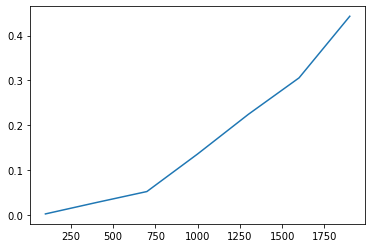

In [443]:
data = []
inputs = [100,400,700,1000,1300,1600,1900]
for i in inputs:
    data.append(time_it(i))
import matplotlib.pyplot as plt
plt.plot(inputs, data)